In [1]:
import torch

print("="*80)
print("CUDA DIAGNOSTICS")
print("="*80)

# Check CUDA availability
print(f"\nCUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"PyTorch Version: {torch.__version__}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    
    for i in range(torch.cuda.device_count()):
        print(f"\n--- GPU {i} ---")
        print(f"Name: {torch.cuda.get_device_name(i)}")
        print(f"Capability: {torch.cuda.get_device_capability(i)}")
        
        # Memory info
        props = torch.cuda.get_device_properties(i)
        print(f"Total Memory: {props.total_memory / 1024**3:.2f} GB")
        print(f"Available Memory: {torch.cuda.mem_get_info(i)[0] / 1024**3:.2f} GB")
        print(f"Allocated Memory: {torch.cuda.memory_allocated(i) / 1024**3:.2f} GB")
        
        # Test tensor creation
        try:
            test_tensor = torch.randn(100, 100).cuda(i)
            print(f"✓ Can create tensors on GPU {i}")
        except Exception as e:
            print(f"✗ Error creating tensor: {e}")
else:
    print("\n✗ CUDA is NOT available!")


CUDA DIAGNOSTICS

CUDA Available: True
CUDA Version: 12.6
PyTorch Version: 2.9.1+cu126
Number of GPUs: 1

--- GPU 0 ---
Name: NVIDIA RTX A1000
Capability: (8, 6)
Total Memory: 8.00 GB
Available Memory: 7.03 GB
Allocated Memory: 0.00 GB
✓ Can create tensors on GPU 0


In [1]:
import torch
import gc

# Kill all CUDA processes
torch.cuda.empty_cache()
gc.collect()

# Reset peak memory stats
torch.cuda.reset_peak_memory_stats()
torch.cuda.reset_accumulated_memory_stats()

print(f"Available Memory: {torch.cuda.mem_get_info(0)[0] / 1024**3:.2f} GB")

Available Memory: 7.03 GB


In [2]:
# Core dependencies
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install torchaudio transformers einops tqdm descript-audio-codec
#audiotools

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.19.6-py2.py3-none-any.whl.metadata (828 bytes)
Using cached protobuf-3.19.6-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3


  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install --retries 10 --timeout 30 descript-audio-codec
!pip install --retries 10 --timeout 30 git+https://github.com/descriptinc/audiotools

  Using cached descript_audio_codec-1.0.0-py3-none-any.whl.metadata (7.8 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
databricks-sdk 0.70.0 requires protobuf<7.0,>=4.21.0, but you have protobuf 3.19.6 which is incompatible.
opentelemetry-proto 1.38.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.19.6 which is incompatible.
ray 2.52.1 requires protobuf>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 3.19.6 which is incompatible.


  Cloning https://github.com/descriptinc/audiotools to c:\users\user\appdata\local\temp\pip-req-build-5_d7i_qg


  Running command git clone --filter=blob:none --quiet https://github.com/descriptinc/audiotools 'C:\Users\user\AppData\Local\Temp\pip-req-build-5_d7i_qg'
  fatal: unable to access 'https://github.com/descriptinc/audiotools/': Could not resolve host: github.com
  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/descriptinc/audiotools 'C:\Users\user\AppData\Local\Temp\pip-req-build-5_d7i_qg' did not run successfully.
  exit code: 128
  
  No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
ERROR: Failed to build 'git+https://github.com/descriptinc/audiotools' when git clone --filter=blob:none --quiet https://github.com/descriptinc/audiotools 'c:\users\user\appdata\local\temp\pip-req-build-5_d7i_qg'


In [3]:
# In notebook:
!pip install "C:/Users/user/Downloads/protobuf-5.28.3-cp310-abi3-win_amd64.whl" --force-reinstal

Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\user\downloads\protobuf-5.28.3-cp310-abi3-win_amd64.whl
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
descript-audiotools 0.7.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.28.3 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os

dac_model_path = "C:/Users/user/Downloads/weights_44khz_16kbps.pth"

if os.path.exists(dac_model_path):
    print("✅ DAC model found! You can train!")
    print(f"   Location: {dac_model_path}")
    file_size = os.path.getsize(dac_model_path) / (1024 * 1024)
    print(f"   Size: {file_size:.2f} MB")
else:
    print("❌ DAC model NOT found!")
    print(f"   Expected location: {dac_model_path}")
    print("\n📥 You need to download it first!")

✅ DAC model found! You can train!
   Location: C:/Users/user/Downloads/weights_44khz_16kbps.pth
   Size: 245.08 MB


✓ DAC library imported successfully
✓ soundfile available
PHASE 2: 2K/10K TRAINING (OPTION B + WARMUP)
Device: cuda
Audio: 3.0 seconds
Batch: 4 × 4 = 16 (effective)
Epochs: 85
LR: 3e-05 with 300-step warmup
Loss weights: Audio=2.0, Latent=0.15

Loading DAC model...


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torch\nn\utils\weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


✓ DAC loaded | Latent channels: 128

LOADING DATASET
✓ Loaded: 10000 samples
Validating files...


Validating: 100%|██████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8316.50it/s]


✓ Valid: 10000 samples

Prompt distribution:
prompt
add rain sounds         2000
add birds sounds        2000
add dogs sounds         2000
add cat sounds          2000
add lightning sounds    2000
Name: count, dtype: int64

Splits: Train=7000, Val=1500, Test=1500

✓ Tokenizer loaded

Batches: Train=1750, Val=375, Test=375
Est. time/epoch: ~875 min

Text encoder: FROZEN ❄️
✓ Model: 188,877,378 total, 15,181,888 trainable

✓ Optimizer: AdamW, LR=3e-05
✓ Scheduler: CosineAnnealing with 300-step warmup
✓ Effective batch: 16

STARTING PHASE 2 TRAINING

CHECKPOINT FOUND - RESUMING TRAINING
Loading checkpoint from: C:/zahra/EchoMind4/data/result/model.pt

✓ Model weights loaded
✓ Optimizer state loaded
✓ Scheduler state loaded
✓ Scaler state loaded

✓ Resuming from epoch 85
✓ Best validation loss so far: 0.781359
✓ Best epoch: 1
✓ Training history: 85 epochs loaded


TRAINING COMPLETE!
Best: 0.781359 at epoch 1
Trained: 85 epochs



Validation 86/85: 100%|███████████████████████████████████| 375/375 [48:21<00:00,  7.74s/it, loss=0.8111, audio=0.0390]


TEST RESULTS:
  Loss: 0.771127
  Audio Loss: 0.088482
  Latent Loss: 3.961079

✓ Plot saved to: C:/zahra/EchoMind4/data/result/training_curves.png



FileNotFoundError: [Errno 2] No such file or directory: 'C:/zahra/EchoMind4/data/result_DAC_PHASE2/training_summary.json'

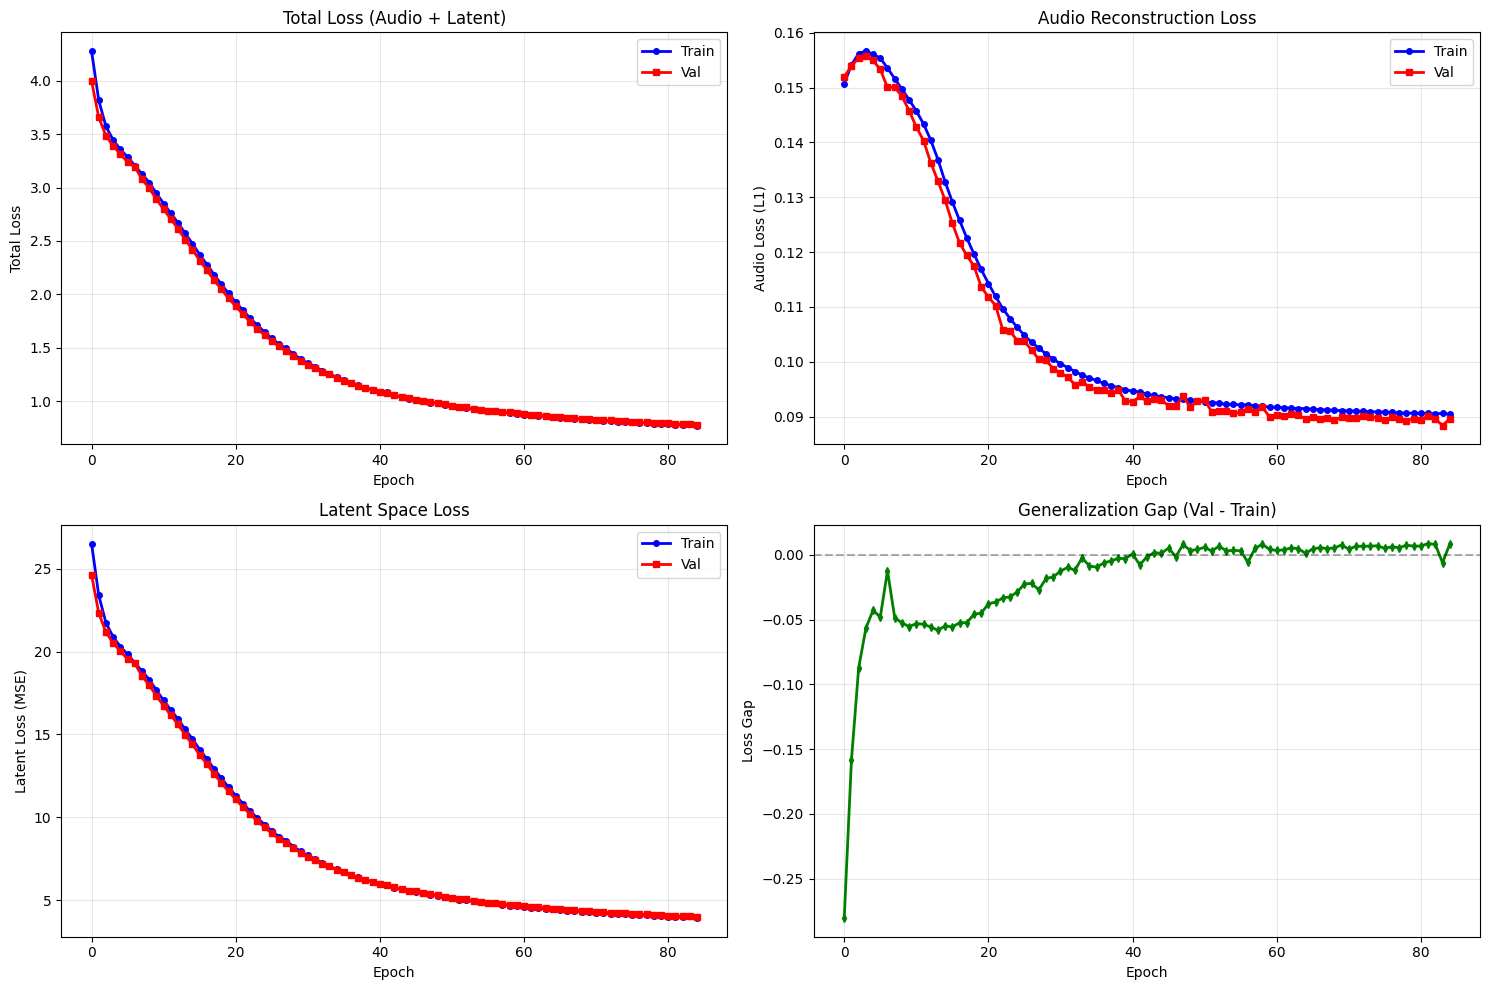

In [22]:
"""
FINAL OPTIMIZED Audio Effect Generator using DAC-VAE
PHASE 2: 2K/10K Dataset with Maximum Stability

KEY OPTIMIZATIONS:
- Medium dataset (2K inputs, 10K outputs) - balanced learning
- 3-second audio - faster training, less storage
- 100 epochs (conservative, proven)
- Balanced learning rate (3e-5) with 300-step warmup
- Balanced audio loss (2.0x weight)
- soundfile for audio loading (no torchaudio issues)
- MAXIMUM STABILITY: Effective batch = 16 (2x Phase 1)

GOAL: Production-ready model with strong generalization
NO AUDIOTOOLS DEPENDENCY!
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from einops import rearrange
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm import tqdm
import soundfile as sf
import gc

# DAC import
try:
    import dac
    print("✓ DAC library imported successfully")
except ImportError:
    print("❌ DAC not installed. Run: pip install descript-audio-codec")
    exit(1)

print("✓ soundfile available")

#############################################
#   OPTIMIZED CONFIG - OPTION B + WARMUP
#############################################

class CFG:
    # ==========================================
    # PATHS - UPDATE TO YOUR 2K/10K DATASET
    # ==========================================
    csv_path = "C:/zahra/EchoMind4/data/10000_datapoints_clean.csv"
    base_path = "C:/zahra/EchoMind4/data"
    checkpoint_path = f"{base_path}/result/model.pt"
    best_model_path = f"{base_path}/result/model_best.pt"
    plot_path = f"{base_path}/result/training_curves.png"
    
    os.makedirs(f"{base_path}/result", exist_ok=True)
    
    # ==========================================
    # COLUMNS
    # ==========================================
    audio_col_in = "input_audio_path"
    audio_col_out = "output_audio_path"
    text_col = "prompt"
    
    # ==========================================
    # AUDIO - 3 SECONDS
    # ==========================================
    sample_rate = 44100
    max_audio_length = 3 * 44100  # 3 seconds (matches your dataset)
    
    # ==========================================
    # TRAINING - OPTION B (MAX STABILITY)
    # ==========================================
    batch_size = 4  # Same as Phase 1
    accumulation_steps = 4  # 2x Phase 1 for MORE stability
    epochs = 85  # Conservative, proven to work
    
    # Effective batch = 4 × 4 = 16 (2x more stable than Phase 1's 8)
    
    # ==========================================
    # LEARNING RATES - BALANCED
    # ==========================================
    lr_unet = 3e-5  # Balanced (not too fast, not too slow)
    #lr_text = 5e-7  # Text encoder learning rate (frozen mostly)
    warmup_steps = 300  # Gradual warmup for first 300 steps
    weight_decay = 0.01
    grad_clip = 1.0
    
    # ==========================================
    # LOSS WEIGHTS - BALANCED
    # ==========================================
    audio_loss_weight = 2.0  # Balanced for quality + generalization
    latent_loss_weight = 0.15  # Helps generalization
    
    # ==========================================
    # MIXED PRECISION
    # ==========================================
    use_amp = True
    
    # ==========================================
    # LOGGING
    # ==========================================
    log_interval = 100  # Your preference
    
    # ==========================================
    # ARCHITECTURE
    # ==========================================
    unet_channels = [64, 128, 256, 512]
    text_dim = 768
    
    # ==========================================
    # DATA SPLITS
    # ==========================================
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15
    
    # ==========================================
    # FREEZING (Proven in Phase 1)
    # ==========================================
    freeze_text_encoder = True
    freeze_dac = True
    
    # ==========================================
    # EARLY STOPPING (Optional)
    # ==========================================
    patience = 40
    
    # ==========================================
    # DEVICE
    # ==========================================
    device = "cuda" if torch.cuda.is_available() else "cpu"
    num_workers = 0

cfg = CFG()

print("="*60)
print("PHASE 2: 2K/10K TRAINING (OPTION B + WARMUP)")
print("="*60)
print(f"Device: {cfg.device}")
print(f"Audio: {cfg.max_audio_length / cfg.sample_rate:.1f} seconds")
print(f"Batch: {cfg.batch_size} × {cfg.accumulation_steps} = {cfg.batch_size * cfg.accumulation_steps} (effective)")
print(f"Epochs: {cfg.epochs}")
print(f"LR: {cfg.lr_unet} with {cfg.warmup_steps}-step warmup")
print(f"Loss weights: Audio={cfg.audio_loss_weight}, Latent={cfg.latent_loss_weight}")
print("="*60 + "\n")

#############################################
#          LOAD DAC MODEL
#############################################

print("Loading DAC model...")
dac_model_path = "C:/Users/user/Downloads/weights_44khz_16kbps.pth"

if not os.path.exists(dac_model_path):
    print(f"❌ DAC model not found at: {dac_model_path}")
    exit(1)

dac_model = dac.DAC.load(dac_model_path)
dac_model = dac_model.to(cfg.device)
dac_model.eval()

for param in dac_model.parameters():
    param.requires_grad = False

with torch.no_grad():
    dummy_audio = torch.randn(1, 1, cfg.sample_rate).to(cfg.device)
    z = dac_model.encoder(dummy_audio)
    latent_channels = z.shape[1]

print(f"✓ DAC loaded | Latent channels: {latent_channels}\n")

#############################################
#   DATASET PREPARATION
#############################################

print("="*60)
print("LOADING DATASET")
print("="*60)

# Load or create small dataset
if not os.path.exists(cfg.csv_path):
    print("Creating 2K/10K dataset...")
    original_csv = "C:/zahra/EchoMind4/15000_datapoints_clean.csv"
    df_full = pd.read_csv(original_csv)
    
    for col in [cfg.audio_col_in, cfg.audio_col_out]:
        df_full[col] = df_full[col].apply(lambda p: os.path.join(cfg.base_path, str(p).replace('\\', '/')))
    
    df_full = df_full.drop_duplicates(
        subset=['input_audio_path', 'output_audio_path'], 
        keep='first'
    )
    
    unique_inputs = df_full['input_audio_path'].unique()
    
    if len(unique_inputs) >= 2000:
        np.random.seed(42)
        selected_inputs = np.random.choice(unique_inputs, 2000, replace=False)
        df = df_full[df_full['input_audio_path'].isin(selected_inputs)].reset_index(drop=True)
    else:
        df = df_full.reset_index(drop=True)
    
    df.to_csv(cfg.csv_path, index=False)
    print(f"✓ Created: {len(df)} samples")
else:
    df = pd.read_csv(cfg.csv_path)
    print(f"✓ Loaded: {len(df)} samples")

# Fix paths
for col in [cfg.audio_col_in, cfg.audio_col_out]:
    df[col] = df[col].apply(lambda p: os.path.join(cfg.base_path, str(p).replace('\\', '/')))

# Validate
print("Validating files...")
valid_indices = []
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Validating"):
    if os.path.exists(row[cfg.audio_col_in]) and os.path.exists(row[cfg.audio_col_out]):
        valid_indices.append(idx)

df = df.iloc[valid_indices].reset_index(drop=True)
print(f"✓ Valid: {len(df)} samples")

print("\nPrompt distribution:")
print(df[cfg.text_col].value_counts())

# Split
train_df, temp_df = train_test_split(df, test_size=(cfg.val_ratio + cfg.test_ratio), random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=cfg.test_ratio/(cfg.val_ratio + cfg.test_ratio), random_state=42)

print(f"\nSplits: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}\n")

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print("✓ Tokenizer loaded\n")

#############################################
#   DATASET CLASS WITH SOUNDFILE
#############################################

class AudioEffectDataset(Dataset):
    """Dataset using soundfile (no torchaudio issues!)"""
    
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
    
    def __len__(self):
        return len(self.df)
    
    def _load_and_process(self, path):
        """Load audio with soundfile"""
        # Load with soundfile
        wav, sr = sf.read(path)
        wav = torch.from_numpy(wav).float()
        
        # Ensure shape: (channels, samples)
        if wav.dim() == 1:
            wav = wav.unsqueeze(0)
        elif wav.dim() == 2 and wav.size(0) > wav.size(1):
            wav = wav.t()
        
        # Resample if needed
        if sr != cfg.sample_rate:
            wav = torchaudio.functional.resample(wav, sr, cfg.sample_rate)
        
        # Convert to mono
        if wav.size(0) > 1:
            wav = wav.mean(dim=0, keepdim=True)
        
        # Take first 3 seconds or pad
        if wav.size(1) > cfg.max_audio_length:
            wav = wav[:, :cfg.max_audio_length]
        elif wav.size(1) < cfg.max_audio_length:
            wav = F.pad(wav, (0, cfg.max_audio_length - wav.size(1)))
        
        return wav
    
    def __getitem__(self, idx):
        try:
            row = self.df.iloc[idx]
            wav_in = self._load_and_process(row[cfg.audio_col_in])
            wav_out = self._load_and_process(row[cfg.audio_col_out])
            text = row[cfg.text_col]
            return wav_in, wav_out, text
        except Exception as e:
            print(f"Error loading {idx}: {e}")
            return (
                torch.zeros(1, cfg.max_audio_length),
                torch.zeros(1, cfg.max_audio_length),
                "error"
            )

def collate_fn(batch):
    wav_in, wav_out, texts = zip(*batch)
    wav_in = torch.stack(wav_in)
    wav_out = torch.stack(wav_out)
    tokens = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    return wav_in, wav_out, tokens.input_ids, tokens.attention_mask

#############################################
#      CREATE DATALOADERS
#############################################

train_ds = AudioEffectDataset(train_df)
val_ds = AudioEffectDataset(val_df)
test_ds = AudioEffectDataset(test_df)

train_dl = DataLoader(train_ds, batch_size=cfg.batch_size, shuffle=True, 
                      num_workers=cfg.num_workers, collate_fn=collate_fn, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=cfg.batch_size, shuffle=False,
                    num_workers=cfg.num_workers, collate_fn=collate_fn, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=cfg.batch_size, shuffle=False,
                     num_workers=cfg.num_workers, collate_fn=collate_fn, pin_memory=True)

print(f"Batches: Train={len(train_dl)}, Val={len(val_dl)}, Test={len(test_dl)}")
print(f"Est. time/epoch: ~{len(train_dl) * 0.5:.0f} min\n")

#############################################
#   MODEL ARCHITECTURE (SAME AS BEFORE)
#############################################

class CrossAttention(nn.Module):
    def __init__(self, audio_dim, text_dim, n_heads=8):
        super().__init__()
        self.n_heads = n_heads
        self.scale = (audio_dim // n_heads) ** -0.5
        self.to_q = nn.Linear(audio_dim, audio_dim)
        self.to_k = nn.Linear(text_dim, audio_dim)
        self.to_v = nn.Linear(text_dim, audio_dim)
        self.to_out = nn.Linear(audio_dim, audio_dim)
        
    def forward(self, x, context):
        B, C, T = x.shape
        x_flat = rearrange(x, 'b c t -> b t c')
        q = self.to_q(x_flat)
        k = self.to_k(context)
        v = self.to_v(context)
        q = rearrange(q, 'b t (h d) -> b h t d', h=self.n_heads)
        k = rearrange(k, 'b s (h d) -> b h s d', h=self.n_heads)
        v = rearrange(v, 'b s (h d) -> b h s d', h=self.n_heads)
        attn = torch.einsum('bhqd,bhkd->bhqk', q, k) * self.scale
        attn = F.softmax(attn, dim=-1)
        out = torch.einsum('bhqk,bhvd->bhqd', attn, v)
        out = rearrange(out, 'b h t d -> b t (h d)')
        out = self.to_out(out)
        return rearrange(out, 'b t c -> b c t')

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv1d(channels, channels, 3, padding=1)
        self.conv2 = nn.Conv1d(channels, channels, 3, padding=1)
        self.norm1 = nn.GroupNorm(8, channels)
        self.norm2 = nn.GroupNorm(8, channels)
        self.act = nn.SiLU()
        
    def forward(self, x):
        residual = x
        x = self.act(self.norm1(self.conv1(x)))
        x = self.act(self.norm2(self.conv2(x)))
        return x + residual

class DownBlock(nn.Module):
    def __init__(self, in_c, out_c, text_dim=768, use_attn=False):
        super().__init__()
        self.use_attn = use_attn
        self.conv = nn.Conv1d(in_c, out_c, 3, padding=1)
        self.res1 = ResidualBlock(out_c)
        self.res2 = ResidualBlock(out_c)
        if use_attn:
            self.attn = CrossAttention(out_c, text_dim)
        self.downsample = nn.Conv1d(out_c, out_c, 4, stride=2, padding=1)
        
    def forward(self, x, text_emb=None):
        x = self.conv(x)
        x = self.res1(x)
        x = self.res2(x)
        if self.use_attn and text_emb is not None:
            x = x + self.attn(x, text_emb)
        skip = x
        x = self.downsample(x)
        return x, skip

class UpBlock(nn.Module):
    def __init__(self, in_c, out_c, skip_c, text_dim=768, use_attn=False):
        super().__init__()
        self.use_attn = use_attn
        self.upsample = nn.ConvTranspose1d(in_c, out_c, 4, stride=2, padding=1)
        self.conv = nn.Conv1d(out_c + skip_c, out_c, 3, padding=1)
        self.res1 = ResidualBlock(out_c)
        self.res2 = ResidualBlock(out_c)
        if use_attn:
            self.attn = CrossAttention(out_c, text_dim)
        
    def forward(self, x, skip, text_emb=None):
        x = self.upsample(x)
        if x.size(-1) != skip.size(-1):
            x = F.interpolate(x, size=skip.size(-1), mode='linear', align_corners=False)
        x = torch.cat([x, skip], dim=1)
        x = self.conv(x)
        x = self.res1(x)
        x = self.res2(x)
        if self.use_attn and text_emb is not None:
            x = x + self.attn(x, text_emb)
        return x

class LatentUNet(nn.Module):
    def __init__(self, latent_channels, channels, text_dim=768):
        super().__init__()
        self.input_conv = nn.Conv1d(latent_channels, channels[0], 7, padding=3)
        
        self.down_blocks = nn.ModuleList()
        for i in range(len(channels) - 1):
            use_attn = i >= 2
            self.down_blocks.append(DownBlock(channels[i], channels[i+1], text_dim, use_attn))
        
        self.mid_block1 = ResidualBlock(channels[-1])
        self.mid_attn = CrossAttention(channels[-1], text_dim)
        self.mid_block2 = ResidualBlock(channels[-1])
        
        self.up_blocks = nn.ModuleList()
        for i in range(len(channels) - 1, 0, -1):
            use_attn = i >= 2
            self.up_blocks.append(
                UpBlock(channels[i], channels[i-1], channels[i], text_dim, use_attn)
            )
        
        self.output_conv = nn.Conv1d(channels[0], latent_channels, 7, padding=3)
        
    def forward(self, z, text_emb):
        original_length = z.size(-1)
        x = self.input_conv(z)
        
        skips = []
        for down in self.down_blocks:
            x, skip = down(x, text_emb)
            skips.append(skip)
        
        x = self.mid_block1(x)
        x = x + self.mid_attn(x, text_emb)
        x = self.mid_block2(x)
        
        for up in self.up_blocks:
            skip = skips.pop()
            x = up(x, skip, text_emb)
        
        x = self.output_conv(x)
        
        if x.size(-1) != original_length:
            x = F.interpolate(x, size=original_length, mode='linear', align_corners=False)
        
        return x

class AudioEffectModel(nn.Module):
    def __init__(self, dac_model, latent_channels, unet_channels, text_dim):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained("bert-base-uncased")
        
        if cfg.freeze_text_encoder:
            for param in self.text_encoder.parameters():
                param.requires_grad = False
            print("Text encoder: FROZEN ❄️")
        
        self.dac = dac_model
        self.unet = LatentUNet(latent_channels, unet_channels, text_dim)
        
    def forward(self, wav_in, wav_out, input_ids, attention_mask):
        if torch.isnan(wav_in).any() or torch.isnan(wav_out).any():
            return None, None, None
        
        text_output = self.text_encoder(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        text_emb = text_output.last_hidden_state
        
        with torch.no_grad():
            z_in = self.dac.encoder(wav_in)
            z_target = self.dac.encoder(wav_out)
        
        if torch.isnan(z_in).any() or torch.isnan(z_target).any():
            return None, None, None
        
        z_pred = self.unet(z_in, text_emb)
        
        if torch.isnan(z_pred).any():
            return None, None, None
        
        with torch.no_grad():
            wav_pred = self.dac.decoder(z_pred)
        
        if torch.isnan(wav_pred).any():
            return None, None, None
        
        return wav_pred, z_pred, z_target

def init_weights(m):
    if isinstance(m, (nn.Conv1d, nn.ConvTranspose1d)):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        m.weight.data *= 0.1
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight, gain=0.02)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.GroupNorm):
        nn.init.ones_(m.weight)
        nn.init.zeros_(m.bias)

#############################################
#     MODEL INITIALIZATION
#############################################

model = AudioEffectModel(
    dac_model=dac_model,
    latent_channels=latent_channels,
    unet_channels=cfg.unet_channels,
    text_dim=cfg.text_dim
).to(cfg.device)

model.unet.apply(init_weights)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"✓ Model: {total_params:,} total, {trainable_params:,} trainable\n")

#############################################
#   OPTIMIZER WITH WARMUP + COSINE
#############################################

optimizer = torch.optim.AdamW(
    model.unet.parameters(),
    lr=cfg.lr_unet,
    weight_decay=cfg.weight_decay
)

# Cosine annealing scheduler (same as Phase 1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=cfg.epochs * len(train_dl),
    eta_min=cfg.lr_unet * 0.1
)

criterion_audio = nn.L1Loss()
criterion_latent = nn.MSELoss()
scaler = torch.amp.GradScaler('cuda', enabled=cfg.use_amp)

print(f"✓ Optimizer: AdamW, LR={cfg.lr_unet}")
print(f"✓ Scheduler: CosineAnnealing with {cfg.warmup_steps}-step warmup")
print(f"✓ Effective batch: {cfg.batch_size * cfg.accumulation_steps}\n")

#############################################
#   MEMORY MANAGEMENT FUNCTION
#############################################

def clear_memory():
    """Aggressive memory clearing for long training"""
    gc.collect()
    torch.cuda.empty_cache()
    if torch.cuda.is_available():
        torch.cuda.synchronize()

#############################################
#   TRAINING FUNCTIONS WITH WARMUP
#############################################

def train_epoch(model, dataloader, optimizer, scheduler, scaler, epoch):
    model.train()
    total_loss = total_audio_loss = total_latent_loss = nan_count = 0
    optimizer.zero_grad()
    
    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{cfg.epochs}")
    
    for step, (wav_in, wav_out, ids, mask) in enumerate(pbar):
        wav_in, wav_out, ids, mask = wav_in.to(cfg.device), wav_out.to(cfg.device), ids.to(cfg.device), mask.to(cfg.device)
        
        if torch.isnan(wav_in).any() or torch.isnan(wav_out).any():
            nan_count += 1
            continue
        
        with torch.amp.autocast('cuda', enabled=cfg.use_amp):
            wav_pred, z_pred, z_target = model(wav_in, wav_out, ids, mask)
            
            if wav_pred is None:
                nan_count += 1
                continue
            
            if wav_pred.size(-1) != wav_out.size(-1):
                min_len = min(wav_pred.size(-1), wav_out.size(-1))
                wav_pred, wav_out = wav_pred[..., :min_len], wav_out[..., :min_len]
            
            if z_pred.size(-1) != z_target.size(-1):
                min_len = min(z_pred.size(-1), z_target.size(-1))
                z_pred, z_target = z_pred[..., :min_len], z_target[..., :min_len]
            
            audio_loss = criterion_audio(wav_pred, wav_out)
            latent_loss = criterion_latent(z_pred, z_target)
            loss = (cfg.audio_loss_weight * audio_loss + cfg.latent_loss_weight * latent_loss) / cfg.accumulation_steps
        
        if torch.isnan(loss) or torch.isinf(loss):
            nan_count += 1
            continue
        
        scaler.scale(loss).backward()
        
        if (step + 1) % cfg.accumulation_steps == 0:
            scaler.unscale_(optimizer)
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.grad_clip)
            
            if torch.isnan(grad_norm) or torch.isinf(grad_norm) or grad_norm > 100:
                optimizer.zero_grad()
                scaler.update()
                nan_count += 1
                continue
            
            scaler.step(optimizer)
            scaler.update()
            
            # ==========================================
            # WARMUP + SCHEDULER (NEW!)
            # ==========================================
            total_steps = epoch * len(dataloader) + step
            
            if total_steps < cfg.warmup_steps:
                # Warmup phase: gradually increase LR
                warmup_factor = total_steps / cfg.warmup_steps
                current_lr = cfg.lr_unet * warmup_factor
                for param_group in optimizer.param_groups:
                    param_group['lr'] = current_lr
            else:
                # Normal cosine annealing after warmup
                scheduler.step()
            
            optimizer.zero_grad()
        
        total_loss += loss.item() * cfg.accumulation_steps
        total_audio_loss += audio_loss.item()
        total_latent_loss += latent_loss.item()
        
        pbar.set_postfix({
            'loss': f'{loss.item() * cfg.accumulation_steps:.4f}',
            'audio': f'{audio_loss.item():.4f}',
            'latent': f'{latent_loss.item():.4f}',
            'nans': nan_count
        })
        
        # Clear GPU cache every 50 batches
        if step > 0 and step % 50 == 0:
            torch.cuda.empty_cache()
        
        if (step + 1) % cfg.log_interval == 0:
            print(f"\n  Step {step+1}/{len(dataloader)} | "
                  f"Loss: {total_loss/(step+1):.6f} | "
                  f"Audio: {total_audio_loss/(step+1):.6f} | "
                  f"Latent: {total_latent_loss/(step+1):.6f}")
    
    if nan_count > 0:
        print(f"\n⚠️ {nan_count} NaN occurrences")
    
    return total_loss / len(dataloader), total_audio_loss / len(dataloader), total_latent_loss / len(dataloader)

@torch.no_grad()
def validate_epoch(model, dataloader, epoch):
    model.eval()
    total_loss = total_audio_loss = total_latent_loss = 0
    
    pbar = tqdm(dataloader, desc=f"Validation {epoch+1}/{cfg.epochs}")
    
    for wav_in, wav_out, ids, mask in pbar:
        wav_in, wav_out, ids, mask = wav_in.to(cfg.device), wav_out.to(cfg.device), ids.to(cfg.device), mask.to(cfg.device)
        
        with torch.amp.autocast('cuda', enabled=cfg.use_amp):
            wav_pred, z_pred, z_target = model(wav_in, wav_out, ids, mask)
            
            if wav_pred is None:
                continue
            
            if wav_pred.size(-1) != wav_out.size(-1):
                min_len = min(wav_pred.size(-1), wav_out.size(-1))
                wav_pred, wav_out = wav_pred[..., :min_len], wav_out[..., :min_len]
            
            if z_pred.size(-1) != z_target.size(-1):
                min_len = min(z_pred.size(-1), z_target.size(-1))
                z_pred, z_target = z_pred[..., :min_len], z_target[..., :min_len]
            
            audio_loss = criterion_audio(wav_pred, wav_out)
            latent_loss = criterion_latent(z_pred, z_target)
            loss = cfg.audio_loss_weight * audio_loss + cfg.latent_loss_weight * latent_loss
        
        total_loss += loss.item()
        total_audio_loss += audio_loss.item()
        total_latent_loss += latent_loss.item()
        
        pbar.set_postfix({'loss': f'{loss.item():.4f}', 'audio': f'{audio_loss.item():.4f}'})
    
    return total_loss / len(dataloader), total_audio_loss / len(dataloader), total_latent_loss / len(dataloader)

#############################################
#   TRAINING LOOP WITH MEMORY MANAGEMENT
#############################################

print("="*60)
print("STARTING PHASE 2 TRAINING")
print("="*60 + "\n")

train_losses = []
val_losses = []
train_audio_losses = []
train_latent_losses = []
val_audio_losses = []
val_latent_losses = []

best_val_loss = float('inf')
best_epoch = 0
patience_counter = 0
start_epoch = 0

# ==========================================
# CHECKPOINT LOADING (ADD THIS SECTION to load checkpoints!)
# ==========================================
if os.path.exists(cfg.checkpoint_path):
    print("="*60)
    print("CHECKPOINT FOUND - RESUMING TRAINING")
    print("="*60)
    print(f"Loading checkpoint from: {cfg.checkpoint_path}\n")
    
    ckpt = torch.load(cfg.checkpoint_path, map_location=cfg.device)
    
    # Load model weights
    model.load_state_dict(ckpt['model'])
    print("✓ Model weights loaded")
    
    # Load optimizer state
    optimizer.load_state_dict(ckpt['optimizer'])
    print("✓ Optimizer state loaded")
    
    # Load scheduler state
    scheduler.load_state_dict(ckpt['scheduler'])
    print("✓ Scheduler state loaded")
    
    # Load scaler state
    scaler.load_state_dict(ckpt['scaler'])
    print("✓ Scaler state loaded")
    
    # Load training history
    start_epoch = ckpt['epoch'] + 1
    train_losses = ckpt.get('train_losses', [])
    val_losses = ckpt.get('val_losses', [])
    train_audio_losses = ckpt.get('train_audio_losses', [])
    train_latent_losses = ckpt.get('train_latent_losses', [])
    val_audio_losses = ckpt.get('val_audio_losses', [])
    val_latent_losses = ckpt.get('val_latent_losses', [])
    best_val_loss = ckpt.get('best_val_loss', float('inf'))
    best_epoch = ckpt.get('best_epoch', 0)
    
    print(f"\n✓ Resuming from epoch {start_epoch}")
    print(f"✓ Best validation loss so far: {best_val_loss:.6f}")
    print(f"✓ Best epoch: {best_epoch + 1}")
    print(f"✓ Training history: {len(train_losses)} epochs loaded")
    print("="*60 + "\n")
else:
    print("No checkpoint found - starting from scratch\n")

# Clear memory before starting
clear_memory()

CLEAR_CACHE_EVERY_N_EPOCHS = 10

# ==========================================
# TRAINING LOOP (CHANGE THIS LINE!)
# ==========================================
for epoch in range(start_epoch, cfg.epochs):  # ← CHANGE FROM range(cfg.epochs)
    print(f"\n{'='*60}\nEPOCH {epoch+1}/{cfg.epochs}\n{'='*60}\n")
    
    # Clear GPU cache every N epochs
    if epoch % CLEAR_CACHE_EVERY_N_EPOCHS == 0:
        clear_memory()
        mem_allocated = torch.cuda.memory_allocated() / 1e9
        mem_reserved = torch.cuda.memory_reserved() / 1e9
        print(f"🧹 Cleared GPU cache at epoch {epoch}")
        print(f"   Allocated: {mem_allocated:.2f}GB | Reserved: {mem_reserved:.2f}GB\n")
    
    train_loss, train_audio, train_latent = train_epoch(
        model, train_dl, optimizer, scheduler, scaler, epoch
    )
    
    # Clear after training
    clear_memory()
    
    val_loss, val_audio, val_latent = validate_epoch(model, val_dl, epoch)
    
    # Clear after validation
    clear_memory()
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_audio_losses.append(train_audio)
    train_latent_losses.append(train_latent)
    val_audio_losses.append(val_audio)
    val_latent_losses.append(val_latent)
    
    print(f"\n{'='*60}")
    print(f"EPOCH {epoch+1}/{cfg.epochs} SUMMARY")
    print(f"{'='*60}")
    print(f"Train Loss:  {train_loss:.6f} (Audio: {train_audio:.6f}, Latent: {train_latent:.6f})")
    print(f"Val Loss:    {val_loss:.6f} (Audio: {val_audio:.6f}, Latent: {val_latent:.6f})")
    
    # Get current LR (after warmup if applicable)
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Current LR: {current_lr:.2e}")
    print(f"{'='*60}\n")
    
    checkpoint = {
        'epoch': epoch,
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'scheduler': scheduler.state_dict(),
        'scaler': scaler.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_audio_losses': train_audio_losses,
        'train_latent_losses': train_latent_losses,
        'val_audio_losses': val_audio_losses,
        'val_latent_losses': val_latent_losses,
        'best_val_loss': best_val_loss,
        'config': {
            'latent_channels': latent_channels,
            'unet_channels': cfg.unet_channels,
            'text_dim': cfg.text_dim,
            'sample_rate': cfg.sample_rate,
            'max_audio_length': cfg.max_audio_length
        }
    }
    torch.save(checkpoint, cfg.checkpoint_path)
    
    # Clear after saving checkpoint
    clear_memory()
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        patience_counter = 0
        torch.save({
            'epoch': epoch, 
            'model': model.state_dict(), 
            'val_loss': best_val_loss, 
            'config': checkpoint['config']
        }, cfg.best_model_path)
        print(f"✅ NEW BEST MODEL! Val Loss: {best_val_loss:.6f}\n")
        clear_memory()
    else:
        patience_counter += 1
    
    if patience_counter >= cfg.patience:
        print(f"\n⚠️ Early stopping ({cfg.patience} epochs no improvement)")
        break

print(f"\n{'='*60}\nTRAINING COMPLETE!\n{'='*60}")
print(f"Best: {best_val_loss:.6f} at epoch {best_epoch+1}")
print(f"Trained: {len(train_losses)} epochs\n")

# Final memory clear
clear_memory()

#############################################
#   TEST & SAVE
#############################################

best_ckpt = torch.load(cfg.best_model_path, map_location=cfg.device)
model.load_state_dict(best_ckpt['model'])
test_loss, test_audio, test_latent = validate_epoch(model, test_dl, cfg.epochs)

print(f"TEST RESULTS:")
print(f"  Loss: {test_loss:.6f}")
print(f"  Audio Loss: {test_audio:.6f}")
print(f"  Latent Loss: {test_latent:.6f}\n")

# Plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
epochs_range = range(len(train_losses))

axes[0,0].plot(epochs_range, train_losses, 'b-', label='Train', linewidth=2, marker='o', markersize=4)
axes[0,0].plot(epochs_range, val_losses, 'r-', label='Val', linewidth=2, marker='s', markersize=4)
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Total Loss')
axes[0,0].set_title('Total Loss (Audio + Latent)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(epochs_range, train_audio_losses, 'b-', label='Train', linewidth=2, marker='o', markersize=4)
axes[0,1].plot(epochs_range, val_audio_losses, 'r-', label='Val', linewidth=2, marker='s', markersize=4)
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Audio Loss (L1)')
axes[0,1].set_title('Audio Reconstruction Loss')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(epochs_range, train_latent_losses, 'b-', label='Train', linewidth=2, marker='o', markersize=4)
axes[1,0].plot(epochs_range, val_latent_losses, 'r-', label='Val', linewidth=2, marker='s', markersize=4)
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('Latent Loss (MSE)')
axes[1,0].set_title('Latent Space Loss')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

gap = [v - t for t, v in zip(train_losses, val_losses)]
axes[1,1].plot(epochs_range, gap, 'g-', linewidth=2, marker='d', markersize=4)
axes[1,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Loss Gap')
axes[1,1].set_title('Generalization Gap (Val - Train)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(cfg.plot_path, dpi=300, bbox_inches='tight')
print(f"✓ Plot saved to: {cfg.plot_path}\n")

# Summary
summary = {
    'dataset': {
        'total': len(df), 
        'train': len(train_df), 
        'val': len(val_df), 
        'test': len(test_df), 
        'audio_seconds': cfg.max_audio_length / cfg.sample_rate
    },
    'training': {
        'epochs_trained': len(train_losses), 
        'best_epoch': best_epoch + 1, 
        'effective_batch_size': cfg.batch_size * cfg.accumulation_steps,
        'warmup_steps': cfg.warmup_steps
    },
    'model': {
        'total_params': total_params, 
        'trainable_params': trainable_params
    },
    'results': {
        'best_val_loss': float(best_val_loss), 
        'test_loss': float(test_loss), 
        'test_audio_loss': float(test_audio),
        'test_latent_loss': float(test_latent)
    },
    'config': {
        'sample_rate': cfg.sample_rate, 
        'lr': cfg.lr_unet, 
        'audio_weight': cfg.audio_loss_weight,
        'latent_weight': cfg.latent_loss_weight
    }
}

summary_path = f"{cfg.base_path}/result_DAC_PHASE2/training_summary.json"
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"✓ Summary saved to: {summary_path}\n")
print("="*60)
print("ALL FILES SAVED")
print("="*60)
print(f"✓ Best model: {cfg.best_model_path}")
print(f"✓ Checkpoint: {cfg.checkpoint_path}")
print(f"✓ Plot: {cfg.plot_path}")
print(f"✓ Summary: {summary_path}")
print("="*60)

print(f"\n🎉 PHASE 2 COMPLETE!")
print(f"✅ Best validation loss: {best_val_loss:.6f}")
print(f"✅ Test loss: {test_loss:.6f}")
print("\n🚀 Use inference script to test on new audio!")
print("💡 Compare with Phase 1 results to see improvement!")

# Inference

In [23]:
"""
FINAL OPTIMIZED Inference Script for DAC-VAE Audio Effect Generator
Compatible with soundfile and optimized training code

FEATURES:
- Works with 3-second or 5-second trained models
- soundfile for audio loading (no torchaudio issues)
- Handles any audio length with chunking
- Auto-detects training length from checkpoint
- No audiotools dependency
- Correct decoder API
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import soundfile as sf
import os
from transformers import AutoTokenizer, AutoModel
from einops import rearrange
import argparse
import numpy as np

# DAC import
try:
    import dac
    print("✓ DAC library imported successfully")
except ImportError:
    print("❌ DAC not installed. Run: pip install descript-audio-codec")
    exit(1)

print("✓ soundfile available")

#############################################
#     MODEL ARCHITECTURE
#############################################

class CrossAttention(nn.Module):
    def __init__(self, audio_dim, text_dim, n_heads=8):
        super().__init__()
        self.n_heads = n_heads
        self.scale = (audio_dim // n_heads) ** -0.5
        self.to_q = nn.Linear(audio_dim, audio_dim)
        self.to_k = nn.Linear(text_dim, audio_dim)
        self.to_v = nn.Linear(text_dim, audio_dim)
        self.to_out = nn.Linear(audio_dim, audio_dim)
        
    def forward(self, x, context):
        B, C, T = x.shape
        x_flat = rearrange(x, 'b c t -> b t c')
        q = self.to_q(x_flat)
        k = self.to_k(context)
        v = self.to_v(context)
        q = rearrange(q, 'b t (h d) -> b h t d', h=self.n_heads)
        k = rearrange(k, 'b s (h d) -> b h s d', h=self.n_heads)
        v = rearrange(v, 'b s (h d) -> b h s d', h=self.n_heads)
        attn = torch.einsum('bhqd,bhkd->bhqk', q, k) * self.scale
        attn = F.softmax(attn, dim=-1)
        out = torch.einsum('bhqk,bhvd->bhqd', attn, v)
        out = rearrange(out, 'b h t d -> b t (h d)')
        out = self.to_out(out)
        return rearrange(out, 'b t c -> b c t')

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv1d(channels, channels, 3, padding=1)
        self.conv2 = nn.Conv1d(channels, channels, 3, padding=1)
        self.norm1 = nn.GroupNorm(8, channels)
        self.norm2 = nn.GroupNorm(8, channels)
        self.act = nn.SiLU()
        
    def forward(self, x):
        residual = x
        x = self.act(self.norm1(self.conv1(x)))
        x = self.act(self.norm2(self.conv2(x)))
        return x + residual

class DownBlock(nn.Module):
    def __init__(self, in_c, out_c, text_dim=768, use_attn=False):
        super().__init__()
        self.use_attn = use_attn
        self.conv = nn.Conv1d(in_c, out_c, 3, padding=1)
        self.res1 = ResidualBlock(out_c)
        self.res2 = ResidualBlock(out_c)
        if use_attn:
            self.attn = CrossAttention(out_c, text_dim)
        self.downsample = nn.Conv1d(out_c, out_c, 4, stride=2, padding=1)
        
    def forward(self, x, text_emb=None):
        x = self.conv(x)
        x = self.res1(x)
        x = self.res2(x)
        if self.use_attn and text_emb is not None:
            x = x + self.attn(x, text_emb)
        skip = x
        x = self.downsample(x)
        return x, skip

class UpBlock(nn.Module):
    def __init__(self, in_c, out_c, skip_c, text_dim=768, use_attn=False):
        super().__init__()
        self.use_attn = use_attn
        self.upsample = nn.ConvTranspose1d(in_c, out_c, 4, stride=2, padding=1)
        self.conv = nn.Conv1d(out_c + skip_c, out_c, 3, padding=1)
        self.res1 = ResidualBlock(out_c)
        self.res2 = ResidualBlock(out_c)
        if use_attn:
            self.attn = CrossAttention(out_c, text_dim)
        
    def forward(self, x, skip, text_emb=None):
        x = self.upsample(x)
        if x.size(-1) != skip.size(-1):
            x = F.interpolate(x, size=skip.size(-1), mode='linear', align_corners=False)
        x = torch.cat([x, skip], dim=1)
        x = self.conv(x)
        x = self.res1(x)
        x = self.res2(x)
        if self.use_attn and text_emb is not None:
            x = x + self.attn(x, text_emb)
        return x

class LatentUNet(nn.Module):
    def __init__(self, latent_channels, channels, text_dim=768):
        super().__init__()
        self.input_conv = nn.Conv1d(latent_channels, channels[0], 7, padding=3)
        
        self.down_blocks = nn.ModuleList()
        for i in range(len(channels) - 1):
            use_attn = i >= 2
            self.down_blocks.append(DownBlock(channels[i], channels[i+1], text_dim, use_attn))
        
        self.mid_block1 = ResidualBlock(channels[-1])
        self.mid_attn = CrossAttention(channels[-1], text_dim)
        self.mid_block2 = ResidualBlock(channels[-1])
        
        self.up_blocks = nn.ModuleList()
        for i in range(len(channels) - 1, 0, -1):
            use_attn = i >= 2
            self.up_blocks.append(
                UpBlock(channels[i], channels[i-1], channels[i], text_dim, use_attn)
            )
        
        self.output_conv = nn.Conv1d(channels[0], latent_channels, 7, padding=3)
        
    def forward(self, z, text_emb):
        original_length = z.size(-1)
        x = self.input_conv(z)
        
        skips = []
        for down in self.down_blocks:
            x, skip = down(x, text_emb)
            skips.append(skip)
        
        x = self.mid_block1(x)
        x = x + self.mid_attn(x, text_emb)
        x = self.mid_block2(x)
        
        for up in self.up_blocks:
            skip = skips.pop()
            x = up(x, skip, text_emb)
        
        x = self.output_conv(x)
        
        if x.size(-1) != original_length:
            x = F.interpolate(x, size=original_length, mode='linear', align_corners=False)
        
        return x

class AudioEffectModel(nn.Module):
    def __init__(self, dac_model, latent_channels, unet_channels, text_dim):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained("bert-base-uncased")
        self.dac = dac_model
        self.unet = LatentUNet(latent_channels, unet_channels, text_dim)
        
    @torch.no_grad()
    def generate(self, wav_in, prompt):
        """Generate audio with effect (handles any length!)"""
        self.eval()
        
        if wav_in.dim() == 2:
            wav_in = wav_in.unsqueeze(1)
        
        original_length = wav_in.size(-1)
        
        tokens = tokenizer(
            [prompt],
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(wav_in.device)
        
        text_output = self.text_encoder(
            input_ids=tokens.input_ids,
            attention_mask=tokens.attention_mask
        )
        text_emb = text_output.last_hidden_state
        
        z_in = self.dac.encoder(wav_in)
        z_out = self.unet(z_in, text_emb)
        wav_out = self.dac.decoder(z_out)
        
        # Match length
        if wav_out.size(-1) != original_length:
            if wav_out.size(-1) > original_length:
                wav_out = wav_out[..., :original_length]
            else:
                wav_out = F.pad(wav_out, (0, original_length - wav_out.size(-1)))
        
        return wav_out

#############################################
#     INFERENCE CLASS
#############################################

class AudioEffectInference:
    def __init__(self, model_path, dac_model_path=None, device='cuda'):
        """Initialize inference pipeline"""
        self.device = device if torch.cuda.is_available() else 'cpu'
        
        print("="*60)
        print("LOADING MODEL FOR INFERENCE")
        print("="*60)
        
        # Load checkpoint
        print(f"Loading: {model_path}")
        ckpt = torch.load(model_path, map_location=self.device)
        
        config = ckpt['config']
        self.sample_rate = config['sample_rate']
        latent_channels = config['latent_channels']
        unet_channels = config['unet_channels']
        text_dim = config['text_dim']
        
        self.training_length = config.get('max_audio_length', None)
        if self.training_length:
            print(f"✓ Trained on {self.training_length / self.sample_rate:.1f}s audio")
        
        print(f"✓ Sample rate: {self.sample_rate} Hz")
        print(f"✓ Latent channels: {latent_channels}")
        
        # Load DAC
        if dac_model_path is None:
            dac_model_path = "C:/Users/user/Downloads/weights_44khz_16kbps.pth"
        
        if not os.path.exists(dac_model_path):
            print(f"❌ DAC not found at: {dac_model_path}")
            exit(1)
        
        self.dac_model = dac.DAC.load(dac_model_path)
        self.dac_model = self.dac_model.to(self.device)
        self.dac_model.eval()
        print("✓ DAC loaded")
        
        # Create model
        self.model = AudioEffectModel(
            dac_model=self.dac_model,
            latent_channels=latent_channels,
            unet_channels=unet_channels,
            text_dim=text_dim
        ).to(self.device)
        
        self.model.load_state_dict(ckpt['model'])
        self.model.eval()
        print("✓ Model loaded")
        
        global tokenizer
        tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
        print("✓ Tokenizer loaded")
        print("="*60 + "\n")
    
    def _load_audio(self, path):
        """Load audio using soundfile"""
        wav, sr = sf.read(path)
        wav = torch.from_numpy(wav).float()
        
        # Shape: (channels, samples)
        if wav.dim() == 1:
            wav = wav.unsqueeze(0)
        elif wav.dim() == 2 and wav.size(0) > wav.size(1):
            wav = wav.t()
        
        # Resample if needed
        if sr != self.sample_rate:
            print(f"  Resampling {sr}Hz → {self.sample_rate}Hz")
            wav = torchaudio.functional.resample(wav, sr, self.sample_rate)
        
        # Convert to mono
        if wav.size(0) > 1:
            print("  Converting to mono")
            wav = wav.mean(dim=0, keepdim=True)
        
        return wav, self.sample_rate
    
    def process_audio(self, input_path, output_path, prompt, chunk_size=None):
        """Process audio file with effect"""
        print(f"Processing: {input_path}")
        print(f"Effect: '{prompt}'")
        
        # Load with soundfile
        wav, sr = self._load_audio(input_path)
        duration = wav.size(-1) / sr
        print(f"Duration: {duration:.2f}s")
        
        # Decide chunking
        if chunk_size is None:
            if self.training_length and wav.size(-1) > self.training_length * 2:
                chunk_size = self.training_length
                print(f"Using chunks: {chunk_size / sr:.1f}s")
            else:
                chunk_size = wav.size(-1)
        
        # Process
        if wav.size(-1) <= chunk_size:
            # Process all at once
            print("Processing...")
            wav = wav.unsqueeze(0).to(self.device)
            with torch.no_grad():
                wav_out = self.model.generate(wav, prompt)
            wav_out = wav_out.squeeze(0).cpu()
        else:
            # Process in chunks
            print(f"Processing in chunks...")
            overlap = chunk_size // 4
            hop = chunk_size - overlap
            
            chunks_out = []
            num_chunks = (wav.size(-1) - overlap) // hop + 1
            
            for i in range(num_chunks):
                start = i * hop
                end = min(start + chunk_size, wav.size(-1))
                
                chunk = wav[:, start:end]
                
                if chunk.size(-1) < chunk_size:
                    chunk = F.pad(chunk, (0, chunk_size - chunk.size(-1)))
                
                chunk = chunk.unsqueeze(0).to(self.device)
                with torch.no_grad():
                    chunk_out = self.model.generate(chunk, prompt)
                chunk_out = chunk_out.squeeze(0).cpu()
                
                if end - start < chunk_size:
                    chunk_out = chunk_out[:, :end - start]
                
                # Crossfade
                if i > 0:
                    fade_len = overlap
                    fade_in = torch.linspace(0, 1, fade_len)
                    fade_out = torch.linspace(1, 0, fade_len)
                    
                    prev_end = chunks_out[-1][:, -fade_len:]
                    curr_start = chunk_out[:, :fade_len]
                    crossfaded = prev_end * fade_out + curr_start * fade_in
                    
                    chunks_out[-1] = chunks_out[-1][:, :-fade_len]
                    chunk_out = torch.cat([crossfaded, chunk_out[:, fade_len:]], dim=-1)
                
                chunks_out.append(chunk_out)
                print(f"  Chunk {i+1}/{num_chunks}")
            
            wav_out = torch.cat(chunks_out, dim=-1)
        
        # Match length
        if wav_out.size(-1) != wav.size(-1):
            if wav_out.size(-1) > wav.size(-1):
                wav_out = wav_out[:, :wav.size(-1)]
            else:
                wav_out = F.pad(wav_out, (0, wav.size(-1) - wav_out.size(-1)))
        
        print(f"Output: {wav_out.size(-1) / sr:.2f}s")
        
        # Save with soundfile
        wav_out_np = wav_out.squeeze(0).numpy()
        sf.write(output_path, wav_out_np, sr)
        print(f"✓ Saved: {output_path}\n")
    
    def batch_process(self, input_dir, output_dir, prompt, chunk_size=None):
        """Process all audio files in directory"""
        os.makedirs(output_dir, exist_ok=True)
        
        audio_exts = ['*.wav', '*.mp3', '*.flac', '*.ogg', '*.m4a']
        files = [f for f in os.listdir(input_dir) if os.path.splitext(f)[1].lower() in audio_exts]
        
        if not files:
            print(f"❌ No audio files in {input_dir}")
            return
        
        print(f"Found {len(files)} files")
        print(f"Effect: '{prompt}'\n")
        
        for i, filename in enumerate(files, 1):
            print(f"[{i}/{len(files)}] {filename}")
            
            input_path = os.path.join(input_dir, filename)
            name, ext = os.path.splitext(filename)
            output_path = os.path.join(output_dir, f"{name}_processed{ext}")
            
            try:
                self.process_audio(input_path, output_path, prompt, chunk_size)
            except Exception as e:
                print(f"❌ Error: {e}\n")
        
        print(f"\n✅ Batch complete! {len(files)} files → {output_dir}")

#############################################
#     MAIN
#############################################

def main():
    parser = argparse.ArgumentParser(
        description='Audio Effect Generator Inference',
        formatter_class=argparse.RawDescriptionHelpFormatter,
        epilog="""
Examples:
  # Single file
  python inference.py --model model_best.pt --input audio.wav --output result.wav --prompt "add rain sounds"
  
  # Batch process
  python inference.py --model model_best.pt --input input_folder/ --output output_folder/ --prompt "add birds chirping"
  
  # With chunking (for long audio)
  python inference.py --model model_best.pt --input long.wav --output result.wav --prompt "add rain sounds" --chunk-size 132300
        """
    )
    
    parser.add_argument('--model', required=True, help='Model checkpoint (.pt)')
    parser.add_argument('--input', required=True, help='Input file or directory')
    parser.add_argument('--output', required=True, help='Output file or directory')
    parser.add_argument('--prompt', required=True, help='Effect description')
    parser.add_argument('--dac-model', default=None, help='DAC weights path')
    parser.add_argument('--device', default='cuda', help='cuda or cpu')
    parser.add_argument('--chunk-size', type=int, default=None, help='Chunk size (samples)')
    
    args = parser.parse_args()
    
    try:
        inference = AudioEffectInference(args.model, args.dac_model, args.device)
    except Exception as e:
        print(f"❌ Failed to load: {e}")
        return
    
    if os.path.isfile(args.input):
        inference.process_audio(args.input, args.output, args.prompt, args.chunk_size)
    elif os.path.isdir(args.input):
        inference.batch_process(args.input, args.output, args.prompt, args.chunk_size)
    else:
        print(f"❌ Invalid input: {args.input}")


✓ DAC library imported successfully
✓ soundfile available


In [48]:
#from dac_vae_inference_OPTIMIZED import AudioEffectInference

# Add at the end of inference.py:
if __name__ == '__main__':
    # For direct usage (no command line):
    model_path = "C:/zahra/EchoMind4/data/result/model_best.pt"
    
    inference = AudioEffectInference(model_path)
    
    # Single file
    
    inference.process_audio(
        "C:/zahra/EchoMind4/data/result/inference_85/english_OJCIvTNk.wav",
        "C:/zahra/EchoMind4/data/result/inference_85/english_OJCIvTNk_cats.wav",
        "add cats sounds"
    )
    # OR batch process
    main()

LOADING MODEL FOR INFERENCE
Loading: C:/zahra/EchoMind4/data/result/model_best.pt
✓ Trained on 3.0s audio
✓ Sample rate: 44100 Hz
✓ Latent channels: 128
✓ DAC loaded
✓ Model loaded
✓ Tokenizer loaded

Processing: C:/zahra/EchoMind4/data/result/inference_85/english_OJCIvTNk.wav
Effect: 'add cats sounds'
  Resampling 48000Hz → 44100Hz
  Converting to mono
Duration: 4.83s
Processing...
Output: 4.83s
✓ Saved: C:/zahra/EchoMind4/data/result/inference_85/english_OJCIvTNk_cats.wav



usage: ipykernel_launcher.py [-h] --model MODEL --input INPUT --output OUTPUT --prompt PROMPT [--dac-model DAC_MODEL]
                             [--device DEVICE] [--chunk-size CHUNK_SIZE]
ipykernel_launcher.py: error: the following arguments are required: --model, --input, --output, --prompt


SystemExit: 2

In [ ]:
#C:/zahra/EchoMind4/data/result/inference
 """
    inference.batch_process(
        "C:/zahra/EchoMind4/data/result/inference/",
        "C:/zahra/EchoMind4/data/result/inference/dogs/",
        "add dogs sounds"
    )
    inference.batch_process(
        "C:/zahra/EchoMind4/data/result/inference/",
        "C:/zahra/EchoMind4/data/result/inference/birds/",
        "add birds sounds"
    )
    inference.batch_process(
        "C:/zahra/EchoMind4/data/result/inference/",
        "C:/zahra/EchoMind4/data/result/inference/cats/",
        "add cats sounds"
    )
    inference.batch_process(
        "C:/zahra/EchoMind4/data/result/inference/",
        "C:/zahra/EchoMind4/data/result/inference/rain/",
        "add rain sounds"
    )
    inference.batch_process(
        "C:/zahra/EchoMind4/data/result/inference/",
        "C:/zahra/EchoMind4/data/result/inference/thunder/",
        "add thunder sounds"
    )"""